<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection_N1_N2_N3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/N1_N2_N3.csv")
X = data.iloc[:,1:76] #independent columns
y = data[['Sleep Stage']]   #target column 

In [2]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [3]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [4]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [5]:
featureScores

,Specs,Score
0,MeanP_Alpha_F4,0.516897
1,MedianF_Alpha_F4,467.535429
2,MeanF_Alpha_F4,3493.810336
3,Spectral Edge_Alpha_F4,3993.442289
4,PeakF_Alpha_F4,271.627152
...,...,...
70,MeanP_Gamma_O2,8.040718
71,MedianF_Gamma_O2,128.681826
72,MeanF_Gamma_O2,16.715946
73,Spectral Edge_Gamma_O2,204.860238


In [6]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs         Score
6          MedianF_Beta_F4  11462.503122
8    Spectral Edge_Beta_F4   8903.788864
33   Spectral Edge_Beta_C4   8122.794973
31         MedianF_Beta_C4   6773.586978
9            PeakF_Beta_F4   5874.260644
34           PeakF_Beta_C4   5299.729094
7            MeanF_Beta_F4   5031.429328
32           MeanF_Beta_C4   4908.966956
56         MedianF_Beta_O2   4281.055036
3   Spectral Edge_Alpha_F4   3993.442289


In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs         Score
6          MedianF_Beta_F4  11462.503122
8    Spectral Edge_Beta_F4   8903.788864
33   Spectral Edge_Beta_C4   8122.794973
31         MedianF_Beta_C4   6773.586978
9            PeakF_Beta_F4   5874.260644
34           PeakF_Beta_C4   5299.729094
7            MeanF_Beta_F4   5031.429328
32           MeanF_Beta_C4   4908.966956
56         MedianF_Beta_O2   4281.055036
3   Spectral Edge_Alpha_F4   3993.442289


In [8]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.0113092  0.01192193 0.02657572 0.02109943 0.00934879 0.01137601
 0.02324702 0.01446932 0.01644422 0.01122409 0.01136556 0.02207364
 0.01359123 0.01244944 0.01230034 0.01076587 0.01053851 0.02020868
 0.01671459 0.00923035 0.01034872 0.01194319 0.01216438 0.0112574
 0.00846185 0.01088339 0.01102512 0.01842115 0.0159323  0.00895346
 0.01064803 0.01932119 0.01446105 0.01463221 0.01118542 0.01067554
 0.02617344 0.01412001 0.0128066  0.0141861  0.01224046 0.01307564
 0.0293528  0.02115668 0.00849367 0.0097925  0.01071366 0.01075429
 0.00985861 0.00775647 0.01008885 0.01296573 0.01280523 0.01079034
 0.0092053  0.01001379 0.01127424 0.0107556  0.01201369 0.00930572
 0.01071931 0.02451059 0.01320289 0.01832977 0.01294595 0.01092731
 0.01005554 0.02375294 0.01432163 0.0076659  0.00938323 0.0113841
 0.01010939 0.00962592 0.00679776]


In [ ]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
#plt.show()
#print(featureScores.nlargest(10,'Score'))

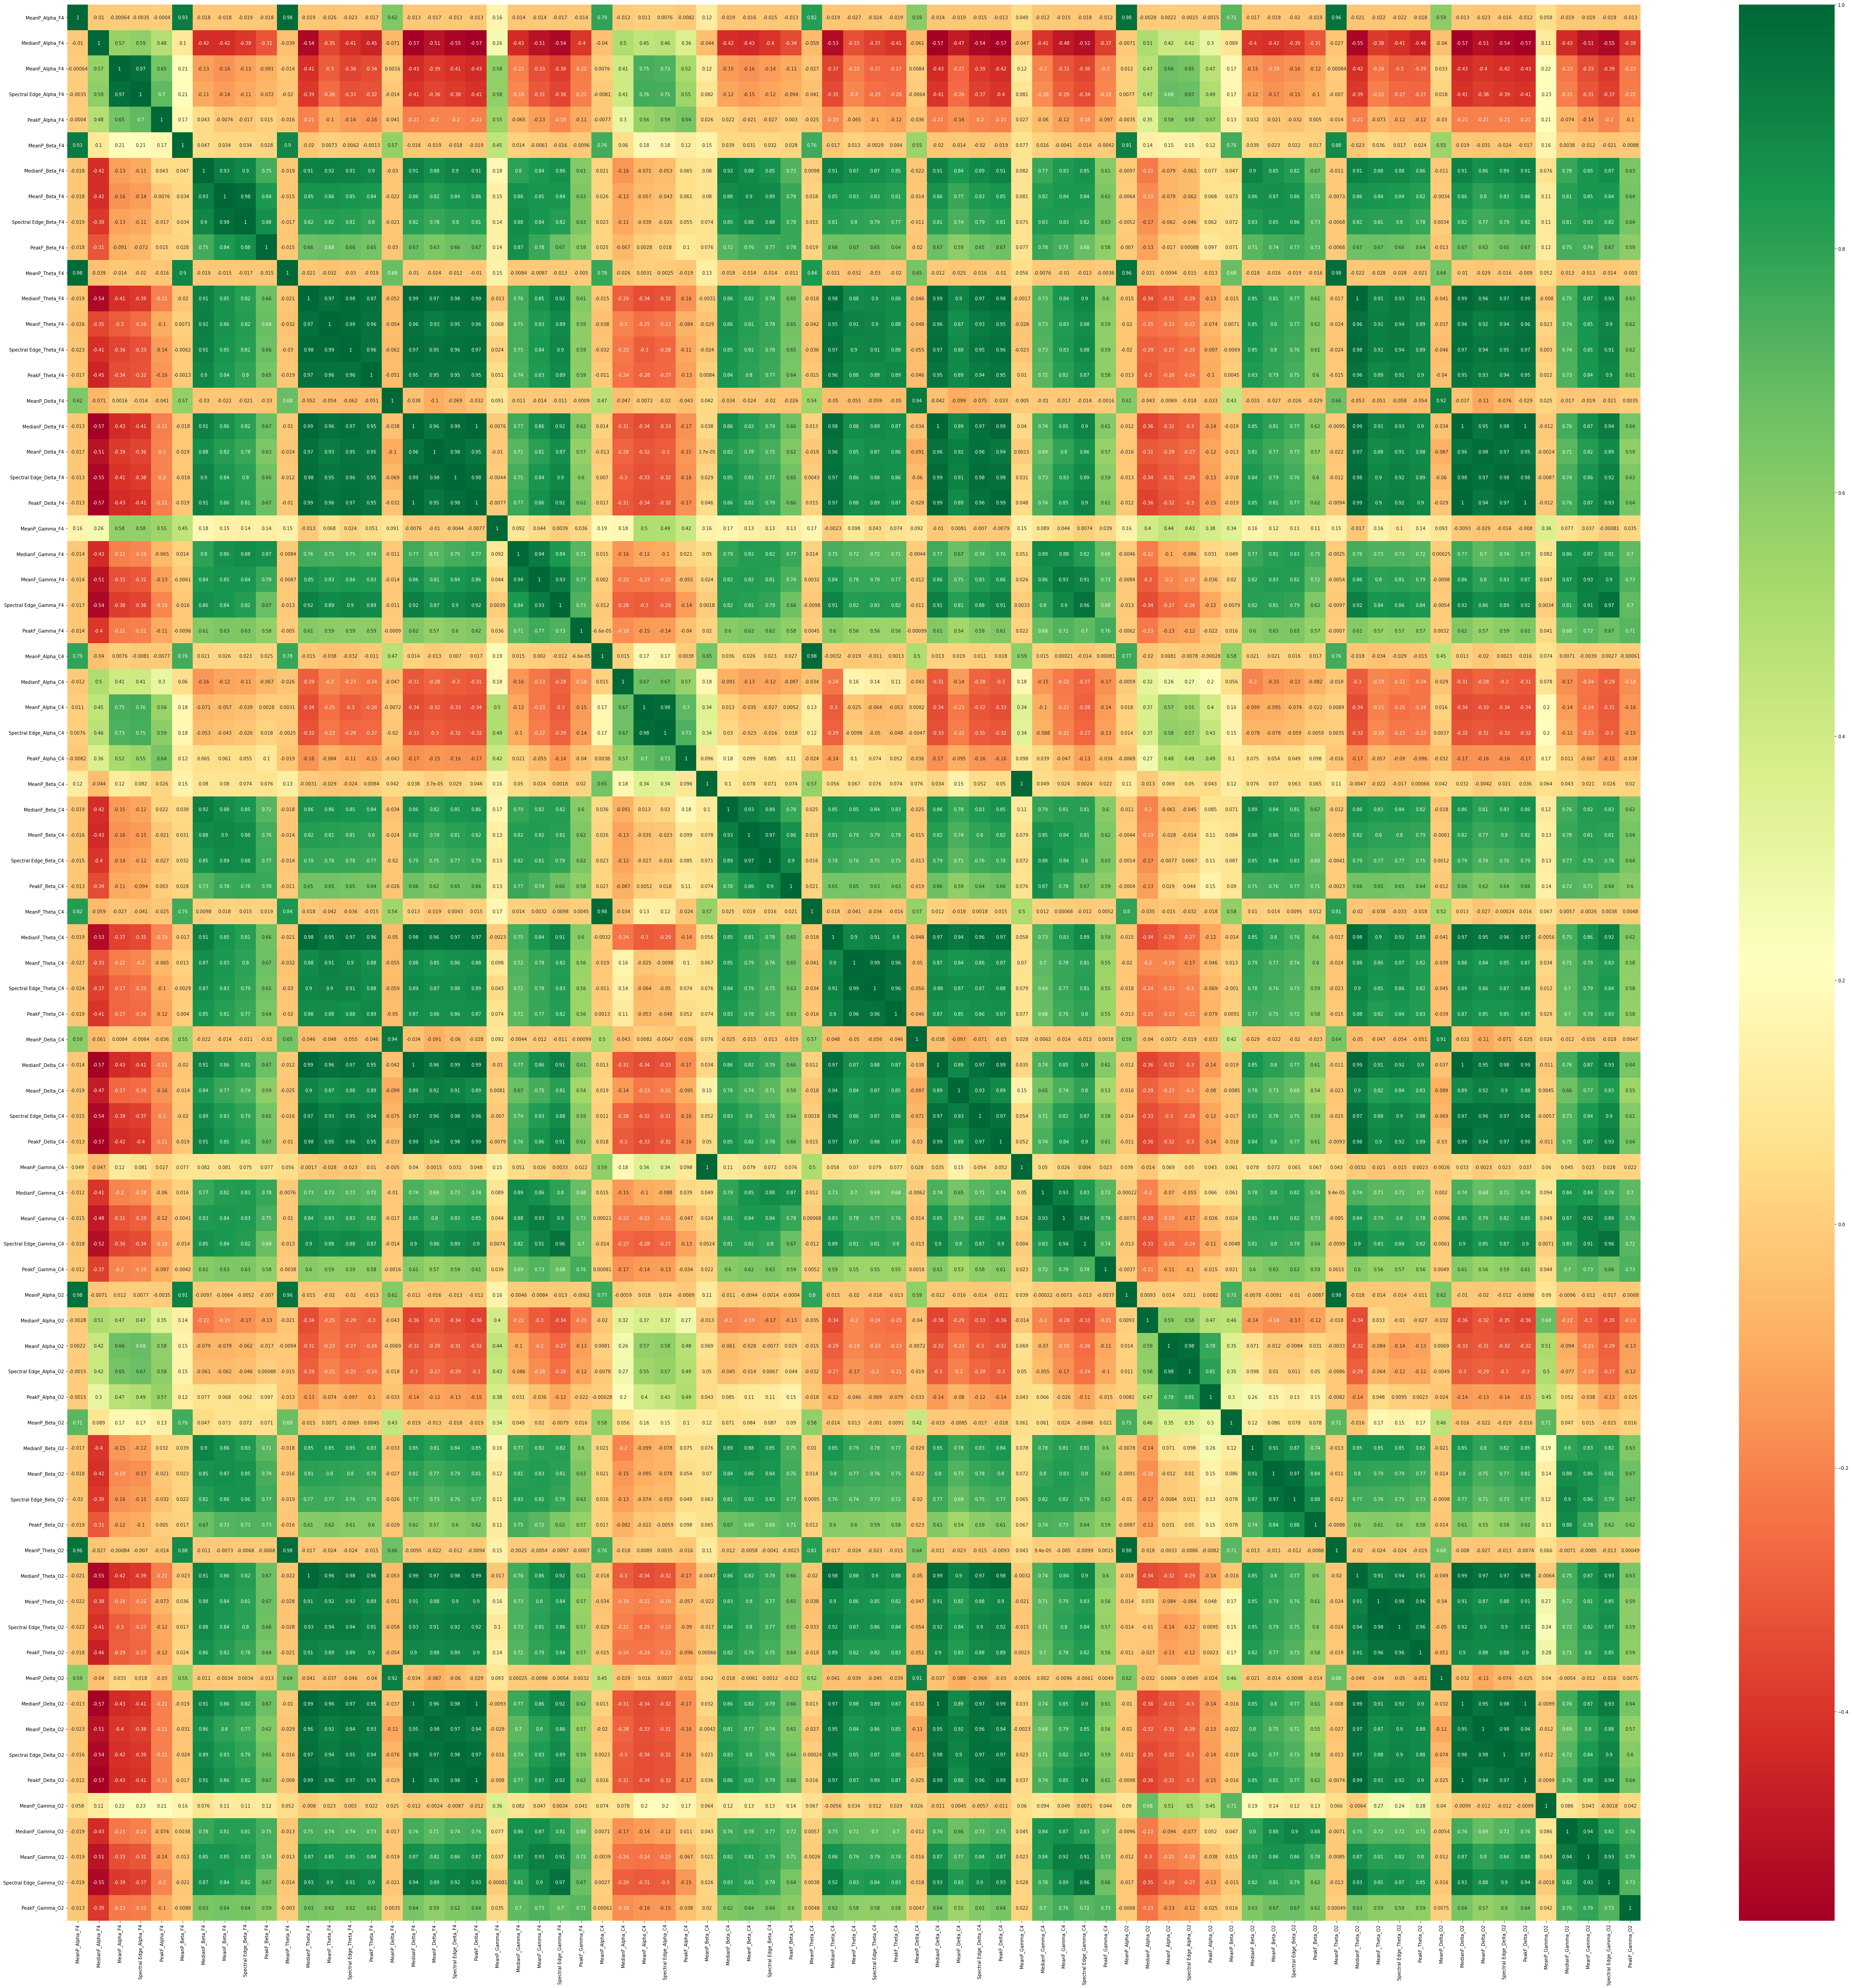

In [8]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

corr() is from panda and works on:
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation